In [123]:
import pandas as pd 

left=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data.xlsx')
left_loss=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data_drop.xlsx')

<Axes: >

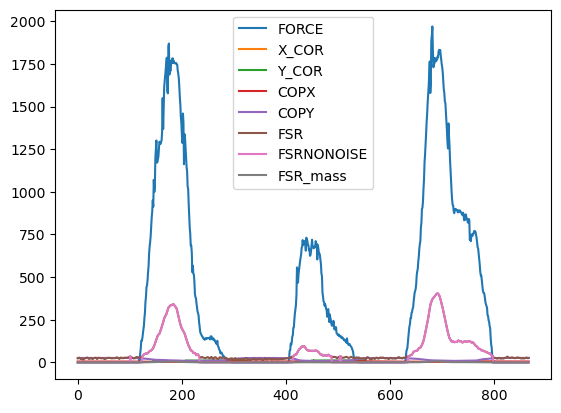

In [124]:
left.plot()

<Axes: >

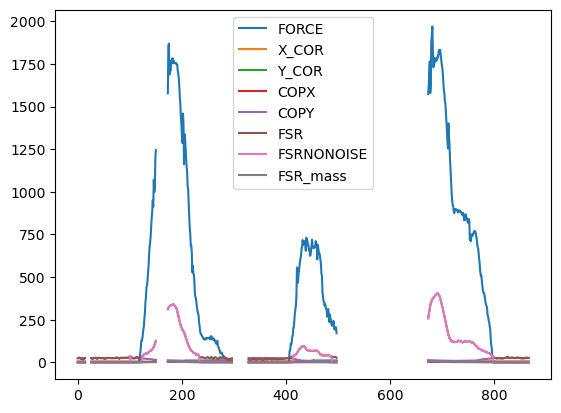

In [125]:
left_loss.plot()

In [126]:
print(left.isnull().sum())
print(left_loss.isnull().sum())

FORCE           0
X_COR         388
Y_COR         629
COPX            0
COPY            0
FSR             0
FSRNONOISE      0
FSR_mass        1
dtype: int64
FORCE         239
X_COR         495
Y_COR         725
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [127]:
left=left.drop(columns=['X_COR','Y_COR'])
left_loss=left_loss.drop(columns=['X_COR','Y_COR'])

In [128]:
print(left.isnull().sum())
print(left_loss.isnull().sum())

FORCE         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      1
dtype: int64
FORCE         239
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [129]:
left=left.fillna(left.mean())


In [130]:
print(left.isnull().sum())
print(left_loss.isnull().sum())

FORCE         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64
FORCE         239
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [131]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
left_drop20=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data_drop.xlsx')
left_drop20=left_drop20.drop(columns=['X_COR','Y_COR'])

knnr_left_drop20=left_drop20.copy()
linear_left_drop20=left_drop20.copy()
re_f_left_drop20=left_drop20.copy()
svr_left_drop20=left_drop20.copy()

In [132]:
print(left_drop20.shape)
import numpy as np 
loss_index=np.array(left_drop20.index).reshape(-1,1)[left_drop20.iloc[:,-1].isna()]
#x_test
print(loss_index.shape)

y_train=left_drop20.dropna()
x_train=y_train.index

print(y_train.shape)

(867, 6)
(240, 1)
(627, 6)


In [133]:
for i in range(len(left_drop20.iloc[0])):
    print(i)
    knnr=KNeighborsRegressor(n_neighbors=5)
    linear=LinearRegression()
    re_f=RandomForestRegressor()
    svr=SVR(kernel='rbf')
    
    knnr.fit(np.array(x_train).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    svr.fit(np.array(x_train).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    linear.fit(np.array(x_train).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    re_f.fit(np.array(x_train).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    
    knnr_impute=knnr.predict(np.array(loss_index).reshape(-1,1))
    linear_impute=linear.predict(np.array(loss_index).reshape(-1,1))
    re_f_impute=re_f.predict(np.array(loss_index).reshape(-1,1))
    svr_impute=svr.predict(np.array(loss_index).reshape(-1,1))
    c=0
    for l in loss_index:
        knnr_left_drop20.iloc[l,i]=knnr_impute[c]
        linear_left_drop20.iloc[l,i]=linear_impute[c]
        re_f_left_drop20.iloc[l,i]=re_f_impute[c]
        svr_left_drop20.iloc[l,i]=svr_impute[c]
        c+=1
    

0
1
2


/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector 

3
4
5


/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector 

Text(0.5, 1.0, 'svr')

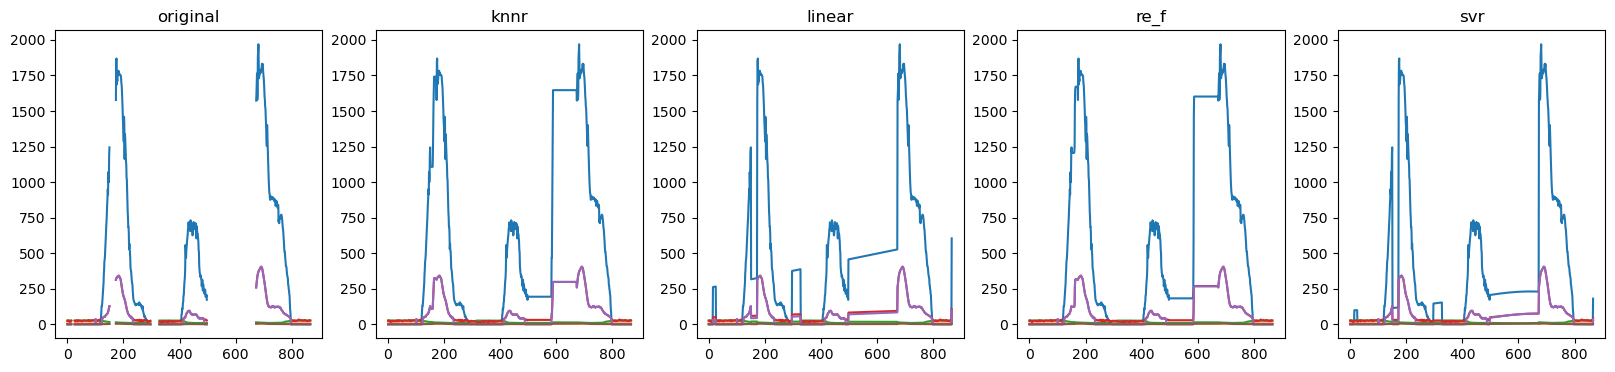

In [134]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
def RMSE(real,pred):
    real=np.array(real).reshape(-1,1)
    pred=np.array(pred).reshape(-1,1)
    return mean_squared_error(real,pred)**0.5


f=plt.figure(figsize=(20,4))
ax=f.add_subplot(1,5,1)
ax.plot(left_drop20)
ax.set_title('original')

ax=f.add_subplot(1,5,2)
ax.plot(knnr_left_drop20)
ax.set_title('knnr')

ax=f.add_subplot(1,5,3)
ax.plot(linear_left_drop20)
ax.set_title('linear')

ax=f.add_subplot(1,5,4)
ax.plot(re_f_left_drop20)
ax.set_title('re_f')

ax=f.add_subplot(1,5,5)
ax.plot(svr_left_drop20)
ax.set_title('svr')

In [135]:
knnr_RMSE=[]
for i in range(6):
    knnr_RMSE.append(RMSE(left.iloc[:,i],knnr_left_drop20.iloc[:,i]))
linear_RMSE=[]
for i in range(6):
    linear_RMSE.append(RMSE(left.iloc[:,i],linear_left_drop20.iloc[:,i]))
re_f_RMSE=[]
for i in range(6):
    re_f_RMSE.append(RMSE(left.iloc[:,i],re_f_left_drop20.iloc[:,i]))
svr_RMSE=[]
for i in range(6):
    svr_RMSE.append(RMSE(left.iloc[:,i],svr_left_drop20.iloc[:,i]))

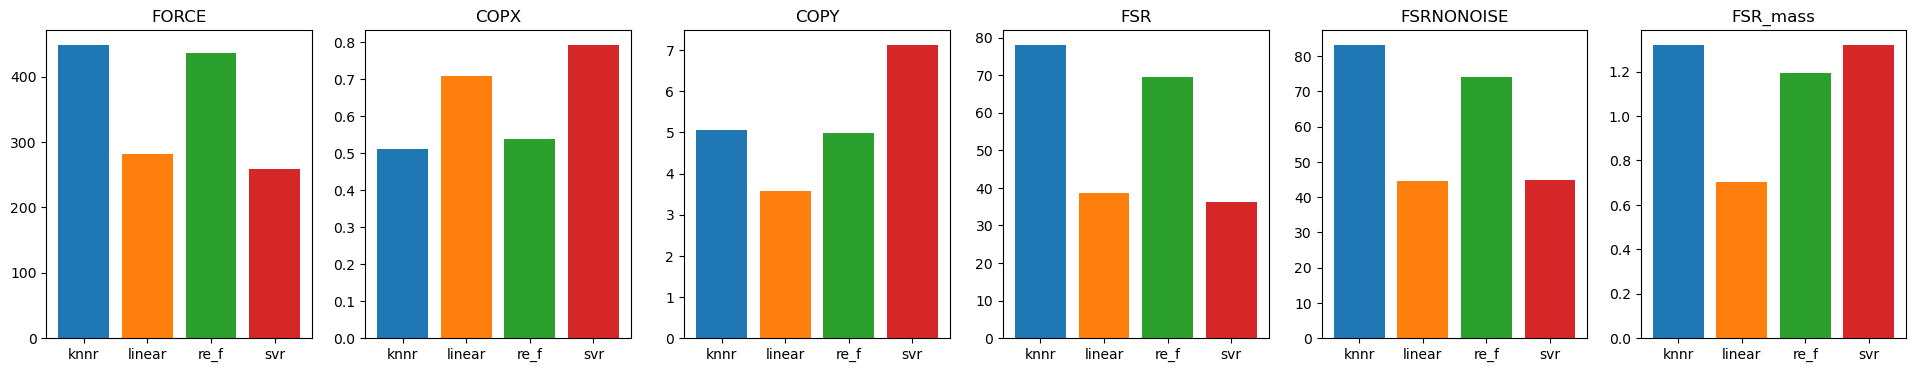

In [136]:

label=left_drop20.columns
f=plt.figure(figsize=(24,4))
for i in range(6):
    ax=f.add_subplot(1,6,i+1)
    ax.set_title(label[i])
    ax.bar(0,knnr_RMSE[i])
    ax.bar(1,linear_RMSE[i])
    ax.bar(2,re_f_RMSE[i])
    ax.bar(3,svr_RMSE[i])
    ax.set_xticks([0,1,2,3],['knnr','linear','re_f','svr'])

In [137]:

fin_left=pd.concat([svr_left_drop20.iloc[:,0],knnr_left_drop20.iloc[:,1],linear_left_drop20.iloc[:,2],
                 svr_left_drop20.iloc[:,3],linear_left_drop20.iloc[:,4],linear_left_drop20.iloc[:,5]],axis=1)

fin_left


,FORCE,COPX,COPY,FSR,FSRNONOISE,FSR_mass
0,0.000000,5.575461,26.583173,24.000000,0.000000,0.000000
1,0.000000,5.578947,26.571607,24.000000,0.000000,0.000000
2,0.000000,5.584776,26.568425,26.000000,0.000000,0.000000
3,0.000000,5.575269,26.562586,28.000000,0.000000,0.000000
4,0.000000,5.583772,26.569648,26.000000,0.000000,0.000000
...,...,...,...,...,...,...
862,0.000000,5.935185,26.638889,29.000000,0.000000,0.000000
863,0.000000,5.940000,26.580000,27.000000,0.000000,0.000000
864,0.000000,6.000000,26.558140,25.000000,0.000000,0.000000
865,0.000000,5.607143,26.428571,25.000000,0.000000,0.000000


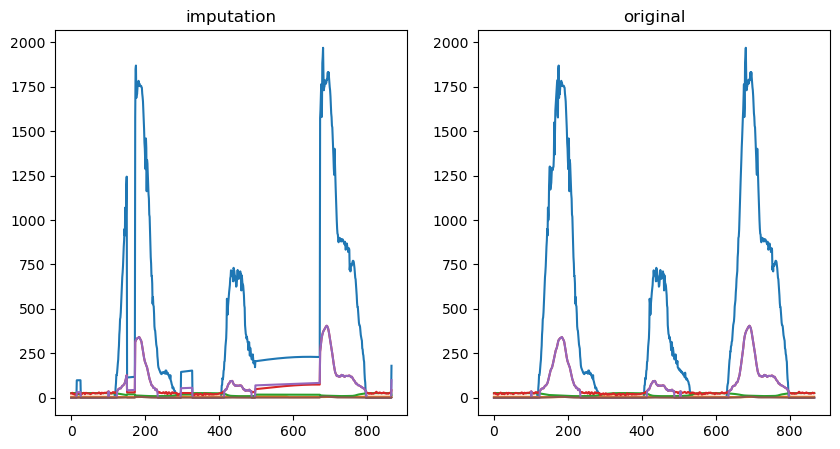

In [138]:
f=plt.figure(figsize=(10,5))
ax=f.add_subplot(1,2,1)
ax.plot(fin_left)
ax.set_title('imputation')
ax=f.add_subplot(1,2,2)
ax.plot(left)
ax.set_title('original')
plt.show()

In [139]:
# 오른쪽으로 왼쪽을 보간한다.
# assignment 2

import pandas as pd
right=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/right_data.xlsx')
left=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data.xlsx')
left_drop20=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data_drop.xlsx')

<Axes: >

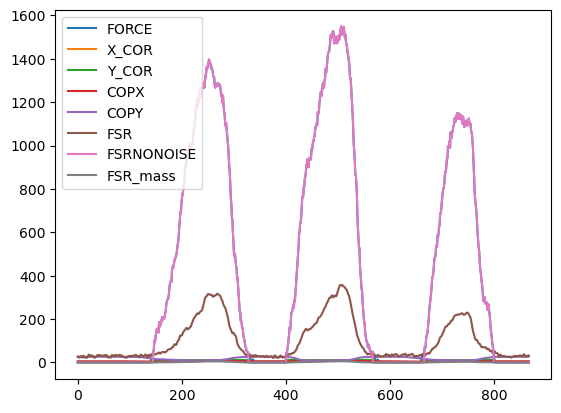

In [140]:
right.plot()

<Axes: >

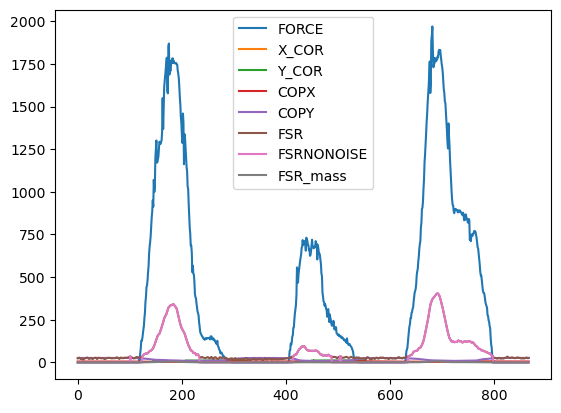

In [141]:
left.plot()

<Axes: >

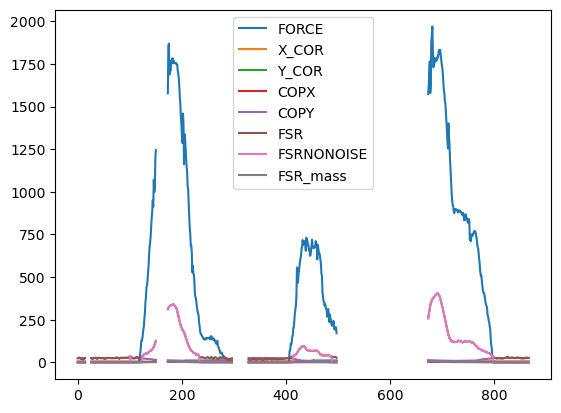

In [142]:
left_drop20.plot()

In [143]:
print(right.isnull().sum())
print(left.isnull().sum())
print(left_drop20.isnull().sum())

FORCE           0
X_COR         358
Y_COR         358
COPX            0
COPY            0
FSR             0
FSRNONOISE      0
FSR_mass        0
dtype: int64
FORCE           0
X_COR         388
Y_COR         629
COPX            0
COPY            0
FSR             0
FSRNONOISE      0
FSR_mass        1
dtype: int64
FORCE         239
X_COR         495
Y_COR         725
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [144]:
right=right.drop(columns=['X_COR','Y_COR'])
left=left.drop(columns=['X_COR','Y_COR'])
left_drop20=left_drop20.drop(columns=['X_COR','Y_COR'])

left=left.fillna(left.mean())

print(right.isnull().sum())
print(left.isnull().sum())
print(left_drop20.isnull().sum())


FORCE         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64
FORCE         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64
FORCE         239
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64


In [145]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# 나중에 채워넣을 복사본 만들기

knnr_left_drop20=left_drop20.copy()
linear_left_drop20=left_drop20.copy()
re_f_left_drop20=left_drop20.copy()
svr_left_drop20=left_drop20.copy()

In [146]:
import numpy as np
print(left_drop20.shape)
index=left.index # all time 1~866
loss_index=np.array(left_drop20.index).reshape(-1,1)[left_drop20.iloc[:,-1].isna()]
loss_index=loss_index.reshape(-1,)
print(loss_index)



(867, 6)
[ 15  16  17  18  19  20  21  22  23  24  25 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 498 499 500 501 502 503 504 505
 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523
 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541
 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559
 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577
 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595
 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613
 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631
 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649
 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667
 668 669 670 671 672 866]


In [147]:
normal_index=np.setdiff1d(index,loss_index)
x_train=right.iloc[normal_index,:]
y_train=left.iloc[normal_index,:]
x_test=right.iloc[loss_index,:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(627, 6)
(627, 6)
(240, 6)


In [148]:
print(x_train)


     FORCE      COPX       COPY  FSR  FSRNONOISE  FSR_mass
0        0  5.575461  26.583173   26           0       0.0
1        0  5.578947  26.571607   27           0       0.0
2        0  5.584776  26.568425   24           0       0.0
3        0  5.575269  26.562586   22           0       0.0
4        0  5.583772  26.569648   24           0       0.0
..     ...       ...        ...  ...         ...       ...
861      0  5.804124  26.572165   28           0       0.0
862      0  5.935185  26.638889   29           0       0.0
863      0  5.940000  26.580000   30           0       0.0
864      0  6.000000  26.558140   31           0       0.0
865      0  5.607143  26.428571   33           0       0.0

[627 rows x 6 columns]


In [149]:
for i in range(len(right.iloc[0])):
    print(i)
    knnr=KNeighborsRegressor(n_neighbors=5)
    linear=LinearRegression()
    re_f=RandomForestRegressor()
    svr=SVR(kernel='rbf')
    
    knnr.fit(np.array(x_train.iloc[:,i]).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    linear.fit(np.array(x_train.iloc[:,i]).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    re_f.fit(np.array(x_train.iloc[:,i]).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    svr.fit(np.array(x_train.iloc[:,i]).reshape(-1,1),np.array(y_train.iloc[:,i]).reshape(-1,1))
    
    
    knnr_impute=knnr.predict(np.array(x_test.iloc[:,i]).reshape(-1,1))
    linear_impute=linear.predict(np.array(x_test.iloc[:,i]).reshape(-1,1))
    re_f_impute=re_f.predict(np.array(x_test.iloc[:,i]).reshape(-1,1))
    vr_impute=svr.predict(np.array(x_test.iloc[:,i]).reshape(-1,1))
    c=0
    for j in loss_index:
        knnr_left_drop20.iloc[j,i]=knnr_impute[c]
        linear_left_drop20.iloc[j,i]=linear_impute[c]
        re_f_left_drop20.iloc[j,i]=re_f_impute[c]
        svr_left_drop20.iloc[j,i]=svr_impute[c]
        c+=1
       
   

0
1
2


/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A 

3
4
5


/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A 

<Axes: >

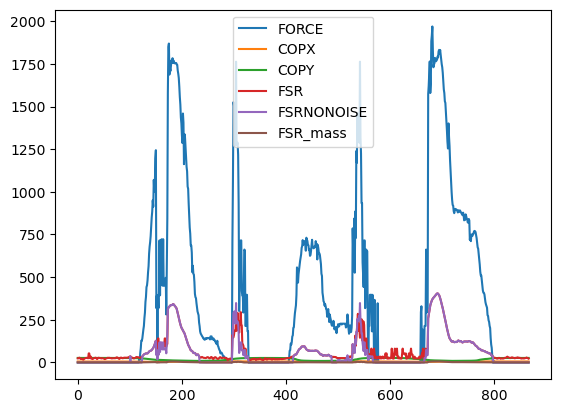

In [150]:
knnr_left_drop20.plot()

Text(0.5, 1.0, 'SVR')

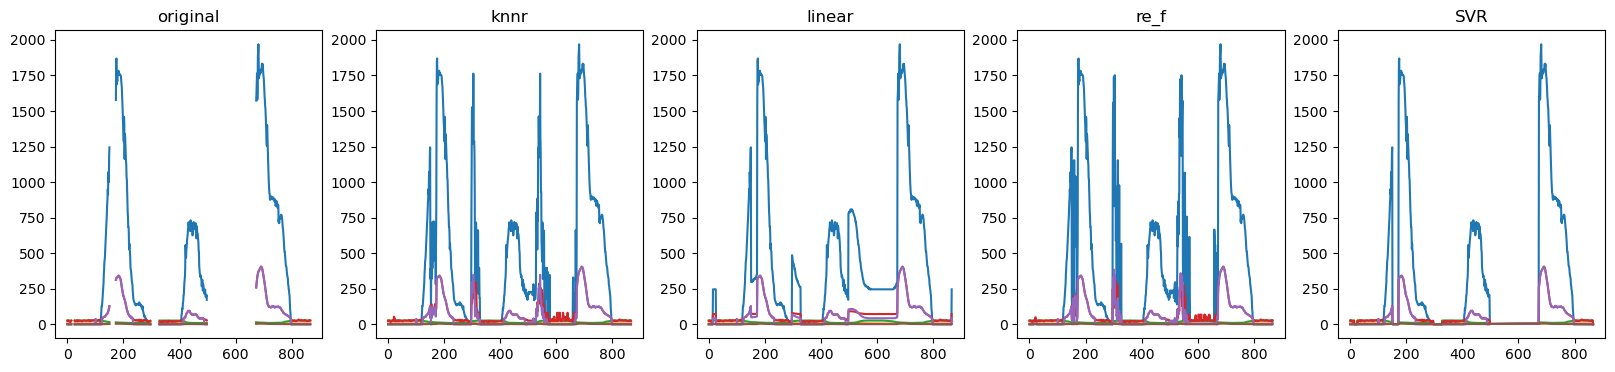

In [151]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
def RMSE(real,pred):
    real=np.array(real).reshape(-1,1)
    pred=np.array(pred).reshape(-1,1)
    return mean_squared_error(real,pred)**0.5




f=plt.figure(figsize=(20,4))
ax=f.add_subplot(1,5,1)
ax.plot(left_drop20)
ax.set_title('original')

ax=f.add_subplot(1,5,2)
ax.plot(knnr_left_drop20)
ax.set_title('knnr')

ax=f.add_subplot(1,5,3)
ax.plot(linear_left_drop20)
ax.set_title('linear')

ax=f.add_subplot(1,5,4)
ax.plot(re_f_left_drop20)
ax.set_title('re_f')

ax=f.add_subplot(1,5,5)
ax.plot(svr_left_drop20)
ax.set_title('SVR')



In [152]:
knnr_RMSE=[]
for i in range(6):
    knnr_RMSE.append(RMSE(left.iloc[:,i],knnr_left_drop20.iloc[:,i]))
linear_RMSE=[]
for i in range(6):
    linear_RMSE.append(RMSE(left.iloc[:,i],linear_left_drop20.iloc[:,i]))
re_f_RMSE=[]
for i in range(6):
    re_f_RMSE.append(RMSE(left.iloc[:,i],re_f_left_drop20.iloc[:,i]))
svr_RMSE=[]
for i in range(6):
    svr_RMSE.append(RMSE(left.iloc[:,i],svr_left_drop20.iloc[:,i]))

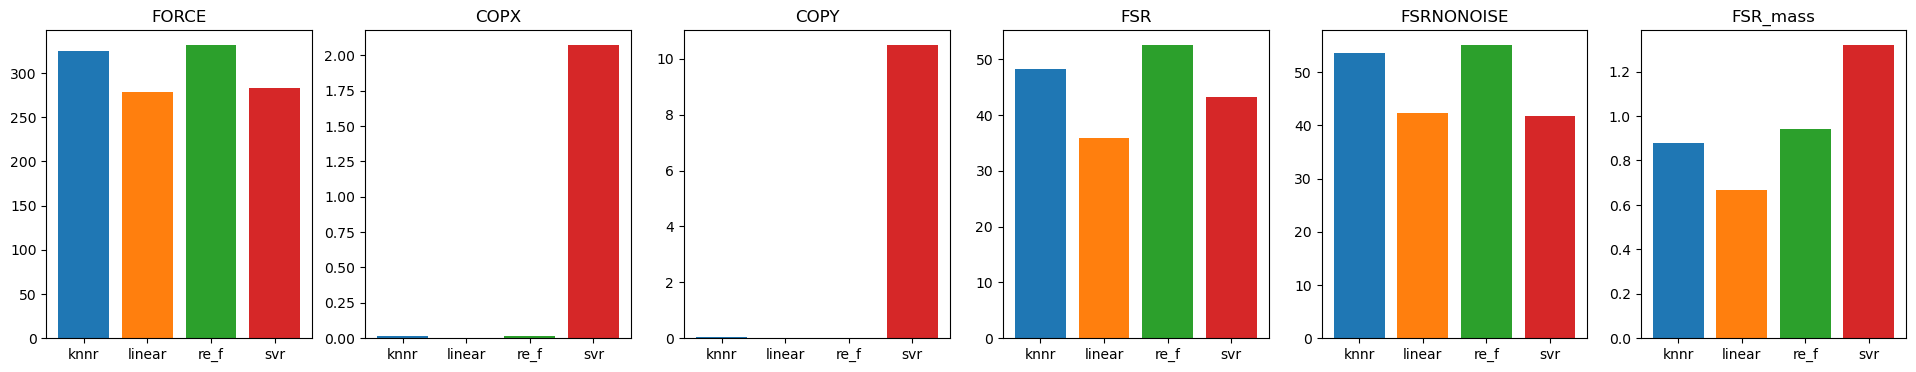

In [153]:
label=left_drop20.columns
f=plt.figure(figsize=(24,4))
for i in range(6):
    ax=f.add_subplot(1,6,i+1)
    ax.set_title(label[i])
    ax.bar(0,knnr_RMSE[i])
    ax.bar(1,linear_RMSE[i])
    ax.bar(2,re_f_RMSE[i])
    ax.bar(3,svr_RMSE[i])
    ax.set_xticks([0,1,2,3],['knnr','linear','re_f','svr'])

In [154]:

fin_left=pd.concat([svr_left_drop20.iloc[:,0],knnr_left_drop20.iloc[:,1],linear_left_drop20.iloc[:,2],
                 svr_left_drop20.iloc[:,3],linear_left_drop20.iloc[:,4],linear_left_drop20.iloc[:,5]],axis=1)

fin_left


,FORCE,COPX,COPY,FSR,FSRNONOISE,FSR_mass
0,0.000000,5.575461,26.583173,24.000000,0.000000,0.000000
1,0.000000,5.578947,26.571607,24.000000,0.000000,0.000000
2,0.000000,5.584776,26.568425,26.000000,0.000000,0.000000
3,0.000000,5.575269,26.562586,28.000000,0.000000,0.000000
4,0.000000,5.583772,26.569648,26.000000,0.000000,0.000000
...,...,...,...,...,...,...
862,0.000000,5.935185,26.638889,29.000000,0.000000,0.000000
863,0.000000,5.940000,26.580000,27.000000,0.000000,0.000000
864,0.000000,6.000000,26.558140,25.000000,0.000000,0.000000
865,0.000000,5.607143,26.428571,25.000000,0.000000,0.000000


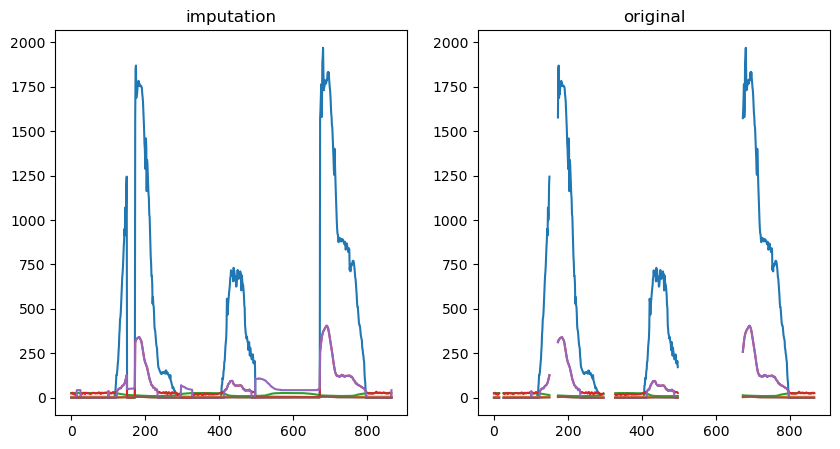

In [155]:
f=plt.figure(figsize=(10,5))
ax=f.add_subplot(1,2,1)
ax.plot(fin_left)
ax.set_title('imputation')
ax=f.add_subplot(1,2,2)
ax.plot(left_drop20)
ax.set_title('original')
plt.show()